In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
def kw(arr,t):
    if len(t) == 0:
        sys.exit('Please input a keyword')
    else:
        pass
    
    num = len(arr[:,0])
    ta = []
    for i in range(len(t)):
        ta.append(t[i])
    ta = array(ta)
    
    if len(where(ta == ':')[0])==1:
        if t == ':':
            b = arange(0,num,1)
            
        else:
            c = where(ta == ':')[0][0]
            A = [int(i) for i in ta[0:c]]
            
            if c ==0:
                B = [int(i) for i in ta[c+1:]]   
                ri = sum([B[i]*10**(len(B)-1-i) for i in range(len(B))])
                if len(where(arr[:,0] == ri)[0])>0:
                    ridx = where(arr[:,0] == ri)[0][0]+1
                    b = arange(0,ridx,1)
                    
                else:
                    sys.exit('list out of range')
                
            elif c == len(ta)-1:
                li = sum([A[i]*10**(len(A)-1-i) for i in range(len(A))])                
                if len(where(arr[:,0] == li)[0])>0: 
                    lidx = where(arr[:,0] == li)[0][0]
                    b = arange(lidx,num,1)
                else:
                    sys.exit('list out of range')
                
            else:
                li = sum([A[i]*10**(len(A)-1-i) for i in range(len(A))])
                B = [int(i) for i in ta[c+1:]]   
                ri = sum([B[i]*10**(len(B)-1-i) for i in range(len(B))])
            
                if len(where(arr[:,0] == li)[0])==1 and len(where(arr[:,0] == ri)[0])==1:
                    lidx = where(arr[:,0] == li)[0][0]
                    ridx = where(arr[:,0] == ri)[0][0]+1
                    b = arange(lidx,ridx,1)
                
                else:
                    sys.exit('list out of range')
                
    else:
        if t.isnumeric() == True:
            if len(where(arr[:,0] == int(t))[0])>0: 
                b  = where(arr[:,0] == int(t))[0]
            else:
                sys.exit('can not find the target element')
                    
        else:
            if len(t)>=2:
                
                if t[1] == '*':  
                    keyword = []
                    for i in range(len(arr[:,1])):
                        keyword.append(arr[:,1][i][0])
                    keyword = array(keyword)
                    
                    if len(where(keyword == t[0])[0])>0:
                        b  = where(keyword == t[0])[0]
                        
                    else:
                        sys.exit('can not find the target element')
                        
                        
                else:
                    if len(where(arr[:,1] == t )[0])>0: 
                        b  = where(arr[:,1] == t )[0]
                        
                    elif len(where(arr[:,2] == t)[0])>0: 
                        b  = where(arr[:,2] == t)[0]
            
                    else:
                        sys.exit('can not find the target element')
            else:
                sys.exit('Keyword too short')
    
    idx = arr[b,0]
    name = arr[b,1]
    key = arr[b,2]
    s  = arr[b,3]
    l = arr[b,4]
    sx = arr[b,5]
    sy = arr[b,6]
    sz = arr[b,7]
    
    return idx, name, key, s, l, sx, sy, sz

In [74]:
def spdf(file,t,pt):
    
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    idx, name, key, s, l, sx, sy, sz = kw(arr,t)

    if pt == 'e' or pt == 'electron' or pt== 'e-':
        idx = 7414-idx[::-1]
        name = name[::-1]
        key = key[::-1]
        s = 3016.315-s[::-1]
        l = l[::-1]
        sx = sx[::-1]
        sy = sy[::-1]
        sz = sz[::-1]
        
    elif pt == 'p' or pt =='positron' or pt =='e+':
        pass
    
    else:
        sys.exit('wrong particle type')
    
    
    pb=pd.DataFrame({'index':idx, 'name':name, 'key':key, 's (m)':s,\
                         'l (m)':l, 'spin.x':sx,'spin.y':sy,'spin.z':sz})
    pd.set_option('display.max_rows', None)
    display(pb)

In [75]:
def sp(file,t,pt):
    
    df = pd.read_fwf(file)
    arr =df.to_numpy()
    idx, name, key, s, l, sx, sy, sz = kw(arr,t) 
    
    if t ==':':
        t ='All'
    else:
        pass
    
    if pt == 'e' or pt == 'electron' or pt== 'e-':
        s = 3016.315-s[::-1]
        sx = sx[::-1]
        sy = sy[::-1]
        sz = sz[::-1]
        
    elif pt == 'p' or pt =='positron' or pt =='e+':
        pass
    
    else:
        sys.exit('wrong particle type')
        
    figure(figsize=(10, 8))
    plot(s,sx,'b-o',label = 'Sx')
    plot(s,sy,'g-o',label = 'Sy')
    plot(s,sz,'r-o',label = 'Sz')
    xlabel('s(m)',size = 25)
    ylabel('Spin Component',size = 25)
    title('Spin component between the %s-Rot and the IP (%s)'%(file[10],t),size =20)
    legend(loc='best')
    show()

In [95]:
spdf("Downloads/L-Spin.txt", 'LTL031','e')

,index,name,key,s (m),l (m),spin.x,spin.y,spin.z
0,5943,LTL031,Drift,2982.3,3.109,0.107795,-0.000922095,0.994173


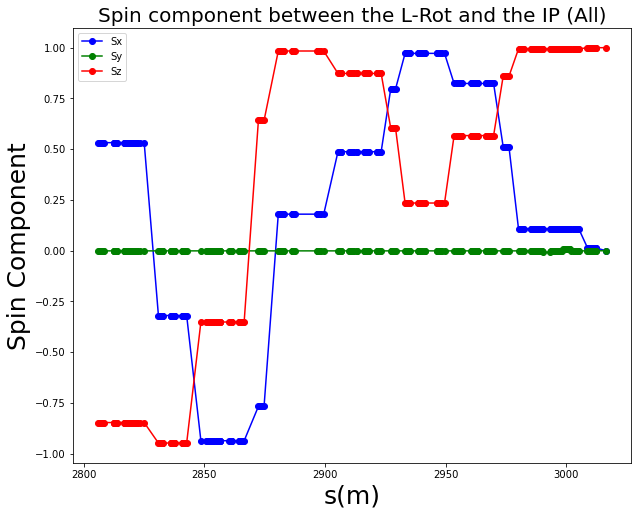

In [101]:
sp("Downloads/L-Spin.txt",':','electron')

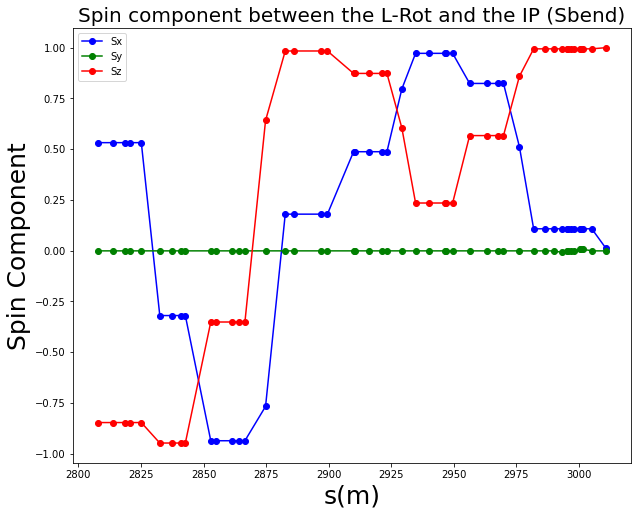

In [78]:
sp("Downloads/L-Spin.txt",'Sbend','e-')

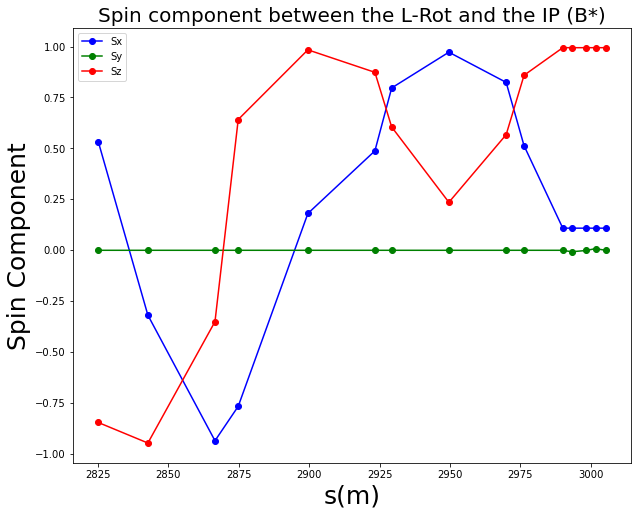

In [100]:
sp("Downloads/L-Spin.txt",'B*','e')

In [80]:
def rsp(file):
    
    arr = array(genfromtxt(file))
    sx = arr[:,5]
    sy = arr[:,6]
    sz = arr[:,7]    

    num = linspace(1,len(sx),len(sx))
    figure(figsize=(10, 8))
    plot(num,sx,'bo',label = 'Sx')
    plot(num,sy,'go',label = 'Sy')
    plot(num,sz,'ro',label = 'Sz')
    xlabel('rot',size =20)
    ylabel('Spin Component ',size =20)
    title('Spin components at the %s-rot region'%file[10],size =20)
    legend(loc = 'best')
    show()